In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [333]:
df=pd.read_csv("titanic.csv")


In [334]:
df.head()


,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [335]:
df1=df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'])
df1

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [336]:
df9=df1
df1.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [306]:
print(len(df1[df1["Survived"]==1]))

342


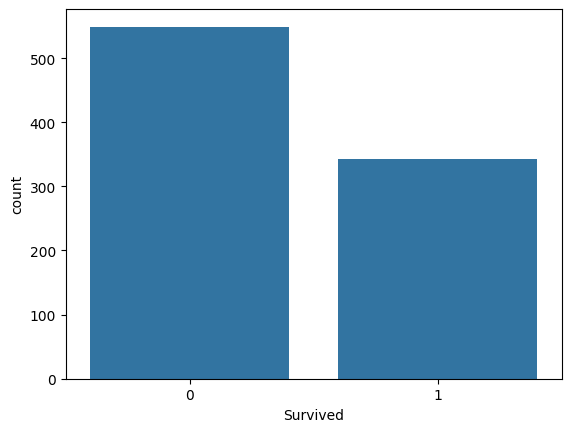

In [307]:

counts= sns.countplot(x="Survived", data=df1 )

In [308]:
df2=df1.groupby("Gender")["Survived"].mean()
df2

Gender
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [309]:

df3=pd.pivot_table(df1,values="Survived",index="Gender", columns="Pclass")
df3

Pclass,1,2,3
Gender,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: ylabel='Gender'>

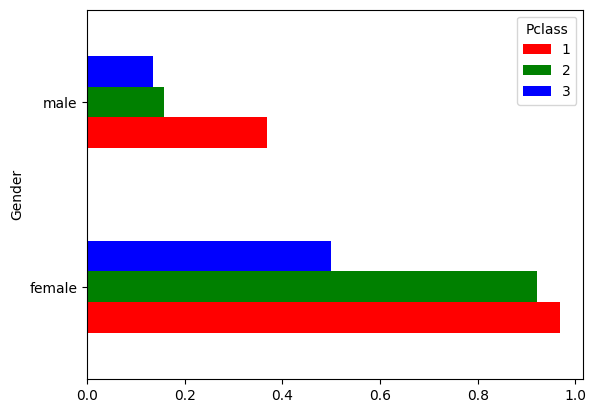

In [310]:

df3.plot.barh(color={"red","green","blue"})


In [311]:
df4=df1
df4['age_cat']=pd.cut(x=df["Age"], bins=[0,18,100], labels=["<=18", '>18'])
print(df4)


     Pclass  Gender   Age     Fare  Survived age_cat
0         3    male  22.0   7.2500         0     >18
1         1  female  38.0  71.2833         1     >18
2         3  female  26.0   7.9250         1     >18
3         1  female  35.0  53.1000         1     >18
4         3    male  35.0   8.0500         0     >18
..      ...     ...   ...      ...       ...     ...
886       2    male  27.0  13.0000         0     >18
887       1  female  19.0  30.0000         1     >18
888       3  female   NaN  23.4500         0     NaN
889       1    male  26.0  30.0000         1     >18
890       3    male  32.0   7.7500         0     >18

[891 rows x 6 columns]


In [312]:
df5=df4.groupby(["Gender","age_cat","Pclass"])["Survived"].mean()
df5

C:\Users\ACERNITRO\AppData\Local\Temp\ipykernel_23708\1828824151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df5=df4.groupby(["Gender","age_cat","Pclass"])["Survived"].mean()


Gender  age_cat  Pclass
female  <=18     1         0.909091
                 2         1.000000
                 3         0.511628
        >18      1         0.972973
                 2         0.900000
                 3         0.423729
male    <=18     1         0.800000
                 2         0.600000
                 3         0.215686
        >18      1         0.375000
                 2         0.071429
                 3         0.133663
Name: Survived, dtype: float64

C:\Users\ACERNITRO\AppData\Local\Temp\ipykernel_23708\120838579.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df6=pd.pivot_table(df4,values="Survived",index=["Gender","age_cat"], columns=["Pclass"])


<Axes: ylabel='Gender,age_cat'>

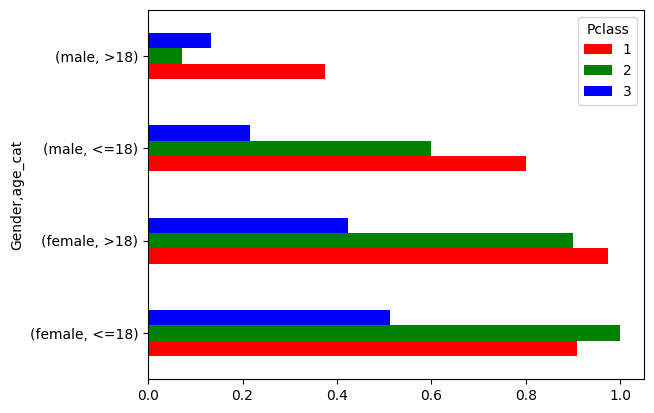

In [313]:
df6=pd.pivot_table(df4,values="Survived",index=["Gender","age_cat"], columns=["Pclass"])
df6.plot.barh(color={"red","green","blue"})

<Axes: xlabel='Pclass', ylabel='Fare'>

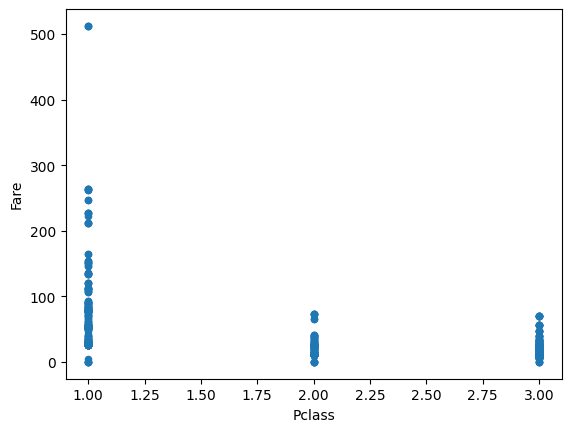

In [314]:
df1.plot.scatter(x='Pclass', y="Fare")

In [315]:
df1[df1["Fare"]==0].count()

Pclass      15
Gender      15
Age          7
Fare        15
Survived    15
age_cat      7
dtype: int64

In [316]:
df8=df1.drop(columns=["Survived","age_cat"])
df8.columns

Index(['Pclass', 'Gender', 'Age', 'Fare'], dtype='object')

In [317]:
df8.head()

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [318]:
# df8["Gender"]=df8["Gender"].replace({'male':1,"female":0})
# df8.head()

df8=pd.get_dummies(df8, columns=["Gender"])
df8

,Pclass,Age,Fare,Gender_female,Gender_male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True
...,...,...,...,...,...
886,2,27.0,13.0000,False,True
887,1,19.0,30.0000,True,False
888,3,NaN,23.4500,True,False
889,1,26.0,30.0000,False,True


In [319]:
df8.describe()

,Pclass,Age,Fare
count,891.000000,714.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,20.125000,7.910400
50%,3.000000,28.000000,14.454200
75%,3.000000,38.000000,31.000000
max,3.000000,80.000000,512.329200


In [320]:
df8.head(10)

,Pclass,Age,Fare,Gender_female,Gender_male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True
5,3,NaN,8.4583,False,True
6,1,54.0,51.8625,False,True
7,3,2.0,21.0750,False,True
8,3,27.0,11.1333,True,False
9,2,14.0,30.0708,True,False


In [321]:
# df8[df8["Age"]="NaN"].count()
df8.head(10)

,Pclass,Age,Fare,Gender_female,Gender_male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True
5,3,NaN,8.4583,False,True
6,1,54.0,51.8625,False,True
7,3,2.0,21.0750,False,True
8,3,27.0,11.1333,True,False
9,2,14.0,30.0708,True,False


In [322]:
meanz=df8["Age"].mean()
meanz

29.69911764705882

In [323]:
df8["Age"] = df8["Age"].fillna(meanz)
df8.head(10)

,Pclass,Age,Fare,Gender_female,Gender_male
0,3,22.000000,7.2500,False,True
1,1,38.000000,71.2833,True,False
2,3,26.000000,7.9250,True,False
3,1,35.000000,53.1000,True,False
4,3,35.000000,8.0500,False,True
5,3,29.699118,8.4583,False,True
6,1,54.000000,51.8625,False,True
7,3,2.000000,21.0750,False,True
8,3,27.000000,11.1333,True,False
9,2,14.000000,30.0708,True,False


In [324]:
df8.describe()

,Pclass,Age,Fare
count,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,13.002015,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,7.910400
50%,3.000000,29.699118,14.454200
75%,3.000000,35.000000,31.000000
max,3.000000,80.000000,512.329200


<Axes: >

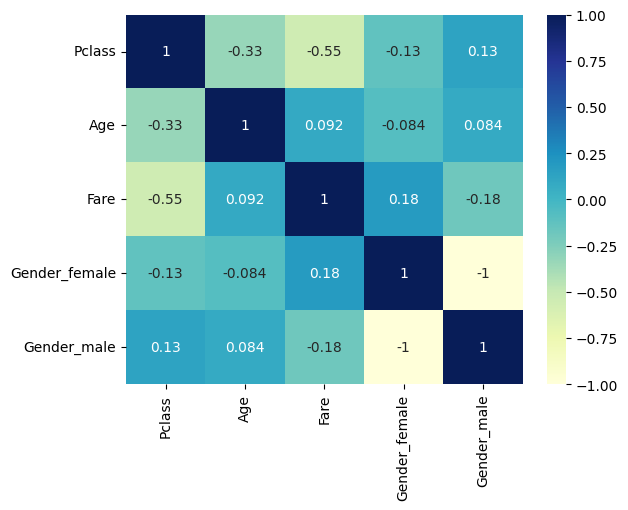

In [325]:
sns.heatmap(df8.corr(), cmap="YlGnBu", annot=True)

<Axes: xlabel='Age', ylabel='Count'>

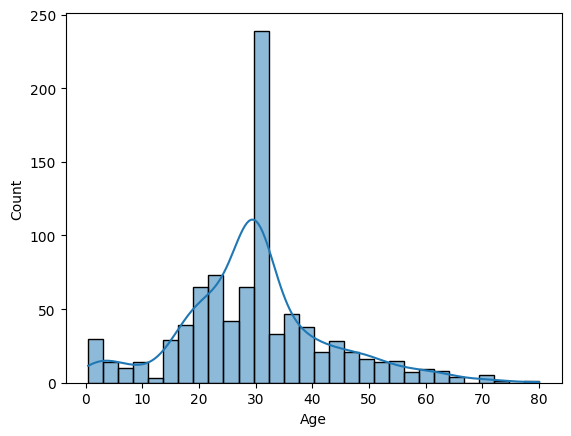

In [326]:
sns.histplot(df8["Age"],kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

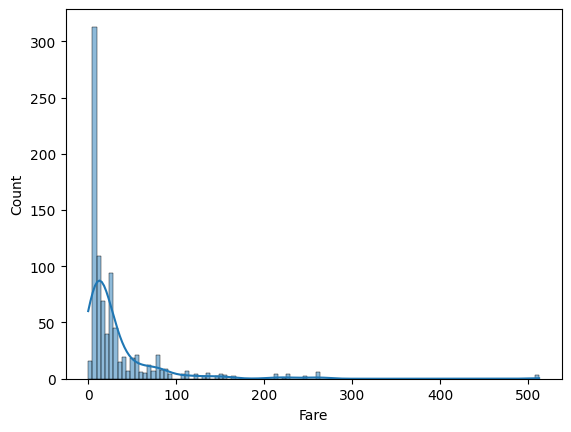

In [327]:
sns.histplot(df8["Fare"],kde=True)

In [346]:
x=df8
y=df9["Survived"]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10)


In [347]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [352]:
y_pred=gnb.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [355]:
result=pd.concat([x_test,y_test], axis =1)
result.head(10)

,Pclass,Age,Fare,Gender_female,Gender_male,Survived
590,3,35.0,7.1250,False,True,0
131,3,20.0,7.0500,False,True,0
628,3,26.0,7.8958,False,True,0
195,1,58.0,146.5208,True,False,1
230,1,35.0,83.4750,True,False,1
646,3,19.0,7.8958,False,True,0
75,3,25.0,7.6500,False,True,0
586,2,47.0,15.0000,False,True,0
569,3,32.0,7.8542,False,True,1
287,3,22.0,7.8958,False,True,0


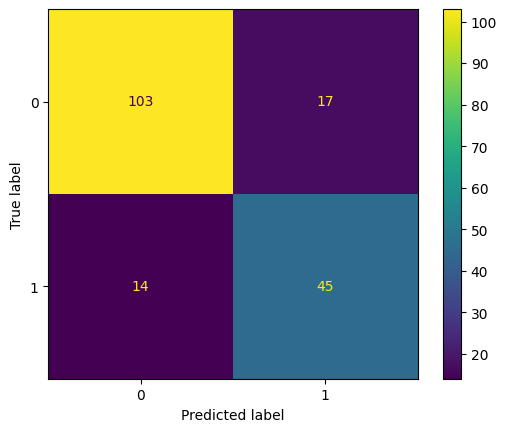

In [357]:
conf=confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=gnb.classes_).plot()

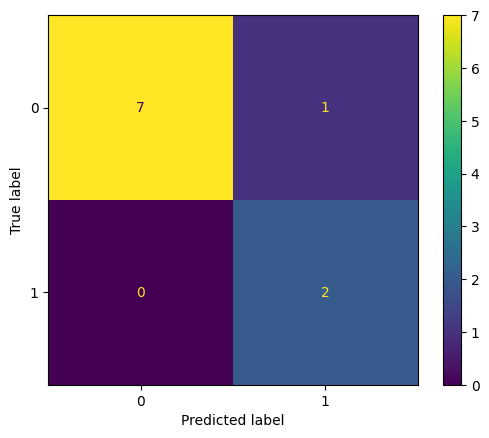

In [360]:
y_pred10=y_pred[:10]
y_test10=y_test[:10]
conf=confusion_matrix(y_pred10, y_test10)
ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=gnb.classes_).plot()

In [371]:
print(classification_report(y_test, y_pred, target_names=['Survived','Not_Survived']))

              precision    recall  f1-score   support

    Survived       0.86      0.88      0.87       117
Not_Survived       0.76      0.73      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [367]:
df9

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [369]:
df9['Age']=pd.cut(x=df["Age"], bins=[0,18,100], labels=["<=18", '>18'])

df9

,Pclass,Gender,Age,Fare,Survived
0,3,male,>18,7.2500,0
1,1,female,>18,71.2833,1
2,3,female,>18,7.9250,1
3,1,female,>18,53.1000,1
4,3,male,>18,8.0500,0
...,...,...,...,...,...
886,2,male,>18,13.0000,0
887,1,female,>18,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,>18,30.0000,1


In [ ]:
cata=CategoricalNB()
cata.fit(x_train,y_train)
y_pred=cata.predict(x_test)